In [1]:
from perceval.backends.core.git import Git
data_repository = Git(uri='https://github.com/grimoirelab/perceval.git', gitpath='/tmp/perceval.git')

In [2]:
items = []
for item in data_repository.fetch():
    items.append(item)
print(len(items))

853


In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(items[0])

{ 'backend_name': 'Git',
  'backend_version': '0.8.7',
  'category': 'commit',
  'data': { 'Author': 'Santiago Dueñas <sduenas@bitergia.com>',
            'AuthorDate': 'Tue Aug 18 18:08:27 2015 +0200',
            'Commit': 'Santiago Dueñas <sduenas@bitergia.com>',
            'CommitDate': 'Tue Aug 18 18:08:27 2015 +0200',
            'commit': 'dc78c254e464ff334892e0448a23e4cfbfc637a3',
            'files': [ { 'action': 'A',
                         'added': '10',
                         'file': '.gitignore',
                         'indexes': ['0000000...', 'ceaedd5...'],
                         'modes': ['000000', '100644'],
                         'removed': '0'},
                       { 'action': 'A',
                         'added': '1',
                         'file': 'AUTHORS',
                         'indexes': ['0000000...', 'a67f214...'],
                         'modes': ['000000', '100644'],
                         'removed': '0'},
                       { 'act

In [ ]:
from perceval.backends.core.discourse import Discourse
forum_data = Discourse(url='http://www.communityleadershipforum.com/')

In [ ]:
from perceval.backends.core.github import GitHub
github_data = GitHub(owner='grimoirelab', repository='perceval', api_token=GITHUB_TOKEN)

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame()

for commit in data_repository.fetch():
    for file in commit['data']['files']:
        df = df.append({'author': commit['data']['Author'],
                        'commit': commit['data']['commit'],
                        'date': commit['data']['AuthorDate'],
                        'file': file['file'],
                        'added': int(file['added']) if 'added' in file.keys() and file['added']!='-' else 0,
                        'removed': int(file['removed']) if 'removed' in file.keys() and file['removed']!='-' else 0},
                       ignore_index=True)

df['date'] = pd.to_datetime(df['date'])

In [23]:
%matplotlib inline
df.set_index(['date'],inplace=True)

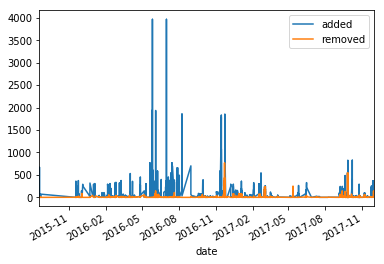

In [24]:
df.plot()

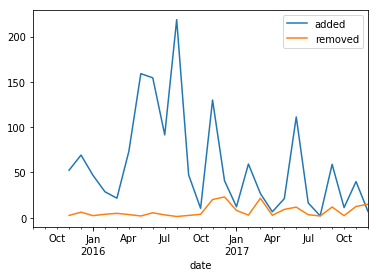

In [33]:
df.resample('M').mean().plot()

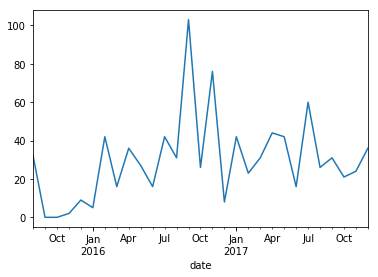

In [30]:
df.resample('M')['commit'].nunique().plot()

In [21]:
df.groupby(['file','author']).mean()

added  \
file                            author                                                           
.gitattributes                  Santiago Dueñas <sduenas@bitergia.com>                1.000000   
.gitignore                      Santiago Dueñas <sduenas@bitergia.com>                4.333333   
.travis.yml                     Santiago Dueñas <sduenas@bitergia.com>                5.000000   
AUTHORS                         Santiago Dueñas <sduenas@bitergia.com>                1.000000   
LICENSE                         Santiago Dueñas <sduenas@bitergia.com>              674.000000   
MANIFEST.in                     Jesus M. Gonzalez-Barahona <jgb@gsyc.es>              1.000000   
                                Santiago Dueñas <sduenas@bitergia.com>                1.000000   
NEWS                            Santiago Dueñas <sduenas@bitergia.com>               36.777778   
README.md                       Alberto Martín <alberto.martin@bitergia.com>          4.500000   
                                Alvaro del Castillo <acs@bitergia.com>                6.400000   
                                J. Manrique Lopez de la Fuente <jsmanrique@bite...    7.000000   
                                Jesus M. Gonzalez-Barahona <jgb@gsyc.es>              3.666667   
                                Luis Cañas Díaz <lcanas@bitergia.com>                 1.000000   
                                Santiago Dueñas <sduenas@bitergia.com>                7.222222   
                                Valerio Cosentino <valcos@bitergia.com>               6.000000   
                                camillem <camillem@users.noreply.github.com>          1.000000   
bin/perceval                    Alberto Martín <alberto.martin@bitergia.com>          1.000000   
                                Alvaro del Castillo <acs@bitergia.com>                1.000000   
                                J. Manrique Lopez de la Fuente <jsmanrique@bite...    1.000000   
                                Luis Cañas Díaz <lcanas@bitergia.com>                 1.000000   
                                Santiago Dueñas <sduenas@bitergia.com>                4.596154   
                                Stephan Barth <stephan.barth@gmail.com>               1.000000   
                                Valerio Cosentino <valcos@bitergia.com>               1.000000   
docker/images/Makefile          Alberto Martín <alberto.martin@bitergia.com>         10.000000   
                                Santiago Dueñas <sduenas@bitergia.com>               19.000000   
docker/images/README.md         Alberto Martín <alberto.martin@bitergia.com>          2.000000   
                                Santiago Dueñas <sduenas@bitergia.com>               12.666667   
                                camillem <camillem@users.noreply.github.com>          1.000000   
docker/images/master/Dockerfile Alberto Martín <alberto.martin@bitergia.com>          0.000000   
                                David Esler <drumandstrum@gmail.com>                  2.000000   
...                                                                                        ...   
tests/test_pipermail.py         Valerio Cosentino <valcos@bitergia.com>              10.000000   
                                quan <zhquan7@gmail.com>                             51.000000   
tests/test_redmine.py           Santiago Dueñas <sduenas@bitergia.com>               63.769231   
                                Stephan Barth <stephan.barth@gmail.com>               1.000000   
                                Valerio Cosentino <valcos@bitergia.com>               3.500000   
tests/test_remo.py              Alvaro del Castillo <acs@bitergia.com>              303.000000   
                                Santiago Dueñas <sduenas@bitergia.com>               32.636364   
tests/test_remo2.py             Alvaro del Castillo <acs@bitergia.com>              193.000000   
                                Santiago Dueñas <sduenas@bitergia.com> 

In [22]:
df.groupby(['file', 'author'])['commit'].nunique()

file                             author                                                  
.gitattributes                   Santiago Dueñas <sduenas@bitergia.com>                       1
.gitignore                       Santiago Dueñas <sduenas@bitergia.com>                       3
.travis.yml                      Santiago Dueñas <sduenas@bitergia.com>                       5
AUTHORS                          Santiago Dueñas <sduenas@bitergia.com>                       5
LICENSE                          Santiago Dueñas <sduenas@bitergia.com>                       1
MANIFEST.in                      Jesus M. Gonzalez-Barahona <jgb@gsyc.es>                     1
                                 Santiago Dueñas <sduenas@bitergia.com>                       1
NEWS                             Santiago Dueñas <sduenas@bitergia.com>                       9
README.md                        Alberto Martín <alberto.martin@bitergia.com>                 6
                                 Alvaro del Ca